## Introduction

Imagine living your life chained in a cave, facing a blank wall. The only things you see are shadows projected onto the wall by objects passing in front of a fire behind you.

![Plats's Allegory of the Cave](https://www.thoughtco.com/thmb/IKZHCYCQ8XplKfR1Vmt_W7BOxkU=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/GettyImages-11410491702-07f03ccd0eb54d36a9b62212cd2f55a1.jpg)

**Figure 1**: Plato's Allegory of the Cave (Source: https://www.thoughtco.com/the-allegory-of-the-cave-120330)

This imagery is derived from Plato's Allegory of the Cave, a profound philosophical story. Though it may seem dark and confined, it carries a deeper meaning. The shadows you see are mere abstractions, simplified versions of objects that are far richer and more complex in reality.

In a similar way, embeddings can be thought of as entities that provide a rich representation of the data we encounter in our everyday lives. They transform complex, high-dimensional data into a simpler, more meaningful form, allowing us to understand and manipulate it more effectively. Just as the shadows on the wall are a simplified depiction of the objects behind you, embeddings offer a way to capture the essence of the information we seek to understand.

In this tutorial, we will cover the following:

1. **What** are embeddings?
2. **How** to store them?
3. **Why** are they important?

## **What** are embeddings?



Embeddings are numerical representations (vecotrs or tensors) of data, often used in machine learning and deep learning to transform complex, high-dimensional information into a more manageable form.

![Tuxedo Winnie](https://i.imgflip.com/8v9bti.jpg)

In deep learning (DL), embeddings are typically learned by neural networks, capturing the underlying relationships and patterns within the data. For example, in natural language processing (NLP), word embeddings convert words into dense vectors where similar words have similar vector representations.

This allows the model to understand semantic relationships between words, such as "king" and "queen" being related to royalty, or "Paris" and "France" being connected by geography.

Similarly, in image recognition, embeddings can represent images in a way that captures visual similarity, enabling tasks like image search or clustering similar images together. By using embeddings, we can perform various operations, such as similarity searches, arithmetic manipulations, and more, making them a powerful tool in the realm of deep learning.


In [1]:
!pip install -U -q sentence-transformers
!pip install -U -q lancedb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 14.7 MB/s eta 0:00:00


In [2]:
import torch
from lancedb.embeddings import get_registry

DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"

print(f"[INFO] using device `{DEVICE}`")

[INFO] using device `cuda:0`


In [3]:
def get_embedding(text):
    """Get embedding of the text from the embedding model"""
    embedding = (
        embedding_model.embedding_model.encode(text, convert_to_tensor=True)
        .cpu()
        .numpy()
    )
    return embedding

For this tutorial we will be using the [SentenceTransformers](https://sbert.net/) library. It provides us with a number of embedding models. Luckily, LancDB has an integration with SentenceTransformers, which makes our lives easier.

In [4]:
embedding_model = (
    get_registry()
    .get("sentence-transformers")  # integration with sentence-transformers
    .create(
        name="all-mpnet-base-v2", device="cuda:0"
    )  # we use the `all-mpnet-base-v2` model
)

Let's take our embedding model for a ride, shall we? We have three texts and we would like to compute the semantic distance between them. Please feel free to change the text and run the cell to see the distance change.

Note: Semantic meaning changes with the task and dataset with which the model was trained. You might find some texts to be semantically similar which are not supposed to be. Now you know why!

In [5]:
text1 = "king"
text2 = "queen"
text3 = "apple"

embedding1 = get_embedding(text1)
embedding2 = get_embedding(text2)
embedding3 = get_embedding(text3)

print(f"Similarity between `{text1}` and `{text2}`: {embedding1.dot(embedding2):.2f}")
print(f"Similarity between `{text1}` and `{text3}`: {embedding1.dot(embedding3):.2f}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Similarity between `king` and `queen`: 0.63
Similarity between `king` and `apple`: 0.21


## **How** to store them?

Storing vector embeddings *efficiently* is crucial for leveraging their full potential in various applications. To **manage**, **query**, and **retrieve** embeddings effectively, especially when dealing with large-scale and multi-modal data, you need a robust solution.

LanceDB is an open-source vector database specifically designed for this purpose. It allows you to store, manage, and query embeddings, making it easier to integrate them with your data.

We will be taking LanceDB for a spin on our multi-modal dataset, and understand how to perform vector arithmetic with the embeddings.

In [6]:
!pip install -U -q pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 18.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pyarrow<18.0.0a0,>=14.0.0, but you have pyarrow 18.0.0 which is incompatible.
pylibcudf-cu12 24.10.1 requires pyarrow<18.0.0a0,>=14.0.0, but you have pyarrow 18.0.0 which is incompatible.


In [7]:
import os
import io
import lancedb
import pandas as pd
import pyarrow as pa
from PIL import Image
from matplotlib import pyplot as plt
from lancedb.pydantic import LanceModel, Vector

## Multi-Modal Dataset

We will be working with the [Flickr-8k](https://paperswithcode.com/dataset/flickr-8k) dataset. It is a multi modal dataset, which consists of images and their corresponding captions.

I have used the [Kaggle dataset](https://www.kaggle.com/datasets/adityajn105/flickr8k) rather than downloading from source as I found it to be programatically more feasible. Just follow along to download the dataset.

In [8]:
!kaggle datasets download -d adityajn105/flickr8k
!unzip -q flickr8k.zip

Dataset URL: https://www.kaggle.com/datasets/adityajn105/flickr8k
License(s): CC0-1.0
100% 1.04G/1.04G [00:49<00:00, 22.1MB/s]
100% 1.04G/1.04G [00:49<00:00, 22.7MB/s]


In [9]:
IMAGE_DIR = "/content/Images"
ANNOTATION_FILE = "/content/captions.txt"

Detour: The Flickr-8k dataset consists of 5 captions per image. I found it to be more efficient to group all the captions together for an image. This decreases the number of rows in the dataset. You can skip this section, and follow along with the original dataset too.

In [10]:
df = pd.read_csv(ANNOTATION_FILE)
df.head()

image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                             caption  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  
2   A little girl climbing into a wooden playhouse .  
3  A little girl climbing the stairs to her playh...  
4  A little girl in a pink dress going into a woo...

In [11]:
df = df.groupby("image")["caption"].apply(list).reset_index(name="caption")
df["caption"] = df["caption"].apply(lambda x: " ".join(x))
df.head()

image  \
0  1000268201_693b08cb0e.jpg   
1  1001773457_577c3a7d70.jpg   
2  1002674143_1b742ab4b8.jpg   
3  1003163366_44323f5815.jpg   
4  1007129816_e794419615.jpg   

                                             caption  
0  A child in a pink dress is climbing up a set o...  
1  A black dog and a spotted dog are fighting A b...  
2  A little girl covered in paint sits in front o...  
3  A man lays on a bench while his dog sits by hi...  
4  A man in an orange hat starring at something ....

## Understanding the Schema of a Vector Database

In any database, a schema defines the **structure** and **organization** of the data, specifying how data is stored, accessed, and managed. In the context of a vector database, the schema becomes particularly important as it needs to accommodate not just traditional data types but also complex structures like vector embeddings.

Consider the following code example, which defines a schema for storing image embeddings along with related data:


In [12]:
pa_schema = pa.schema(
    [
        pa.field("vector", pa.list_(pa.float32(), 768)),
        pa.field("image_id", pa.string()),
        pa.field("image", pa.binary()),
        pa.field("captions", pa.string()),
    ]
)


class Schema(LanceModel):
    vector: Vector(embedding_model.ndims()) = embedding_model.VectorField()
    image_id: str
    image: bytes
    captions: str = embedding_model.SourceField()

Here, the schema is defined using PyArrow (`pa`) and a custom model class `Schema`. The `pa_schema` specifies the data types for each field:
- `vector`: A list of `768` float32 values representing the embedding vector.
- `image_id`: A string identifier for the image.
- `image`: Binary data representing the image itself.
- `captions`: A string containing descriptive text about the image.

The custom `Schema` class, inheriting from `LanceModel`, further organizes these fields. It uses a `Vector` type for the embedding vector, ensuring it aligns with the dimensions of the model's output. The `image_id` is a string, `image` is stored as bytes, and `captions` are linked to the source field of the embedding model.

## Ingesting Data into the Database

This section of the code is responsible for processing and ingesting the dataset into LanceDB, making it a powerful and efficient practice for managing your data. Let's break down the code and understand why this approach is advantageous:

In [34]:
def process_dataset(dataset):
    for idx, (image_id, caption) in enumerate(dataset.values):
        try:
            with open(os.path.join(IMAGE_DIR, image_id), "rb") as image:
                binary_image = image.read()

        except FileNotFoundError:
            print(f"image_id '{image_id}' not found in the folder, skipping.")
            continue

        image_id = pa.array([image_id], type=pa.string())
        image = pa.array([binary_image], type=pa.binary())
        caption = pa.array([caption], type=pa.string())

        # Ensure caption is a string when passed to get_embedding
        embedding = pa.array(
            [get_embedding(str(caption[0]))], type=pa.list_(pa.float32(), 768)
        )

        yield pa.RecordBatch.from_arrays(
            [embedding, image_id, image, caption],
            ["vector", "image_id", "image", "captions"],
        )

This function, `process_dataset`, iterates through each entry in the dataset, reads the corresponding image file, and converts it into a **binary** format. If the image file is not found, it skips that entry, ensuring robustness.

It then creates arrays for the `image_id`, `image`, and `caption` fields and yields a `RecordBatch` containing these arrays. This batch processing is efficient and keeps the data organized.

In [35]:
db = lancedb.connect("embedding_dataset")
tbl = db.create_table("table", schema=Schema, mode="overwrite")
tbl.add(process_dataset(df))

Here, the code connects to a LanceDB database named `embedding_dataset` and creates a table with the defined Schema. The `mode="overwrite"` ensures that any existing table with the same name is replaced, allowing for a clean slate. The `tbl.add(process_dataset(df))` line then adds the processed dataset to the table.

## Why This is a Good Practice

- **Centralized Storage**: Everything—images, text, and embeddings—is stored in one place, making it easier to manage and query. This centralized approach simplifies data handling and enhances efficiency.
  
- **Automated Encoding**: LanceDB handles the encoding of data, eliminating the need for manual encoding. This reduces the chances of errors and ensures consistency across the dataset.
  
- **Efficiency**: By processing data in batches and using an optimized schema, the ingestion process is both fast and scalable, capable of handling large datasets with ease.

In [36]:
def show_image(image):
    stream = io.BytesIO(image)
    plt.imshow(Image.open(stream))
    plt.axis("off")
    plt.show()

## Semantic Search Made Simple

Semantic search is a powerful technique that allows us to **retrieve** data based on the meaning and context of the search query, rather than relying solely on keyword matching. This is particularly useful in scenarios where we want to find images, documents, or other data types that are semantically similar to a given query.

Manually implementing semantic search would be a complex and daunting task. It would require extensive work to encode both the search query and the dataset into a comparable format, and then efficiently compare them to find the most relevant results. This involves dealing with high-dimensional vector operations, managing large datasets, and ensuring that the comparisons are both accurate and performant.

Thankfully, with LanceDB, semantic search becomes straightforward and elegant. The API design is intuitive and powerful, making it easy to perform complex searches with minimal code. Let's take a look at the following example:

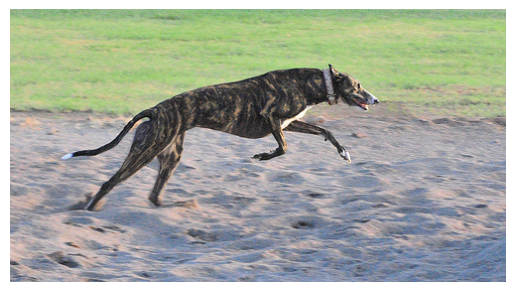

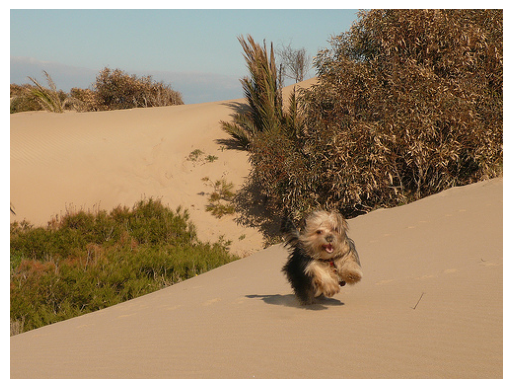

In [37]:
query = "dog running through sand"

hit_lists = tbl.search(query).metric("cosine").limit(2).to_list()

for hit in hit_lists:
    show_image(hit["image"])

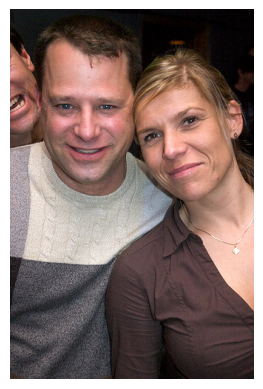

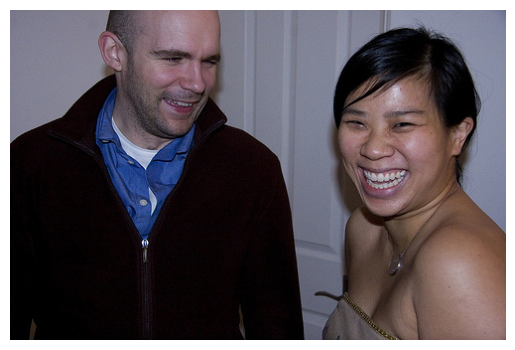

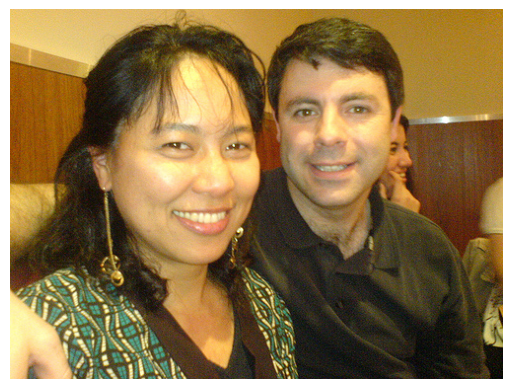

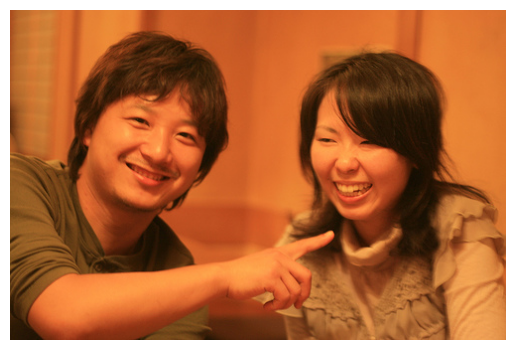

In [38]:
query = "people smiling"

hit_lists = tbl.search(query).metric("cosine").limit(4).to_list()

for hit in hit_lists:
    show_image(hit["image"])

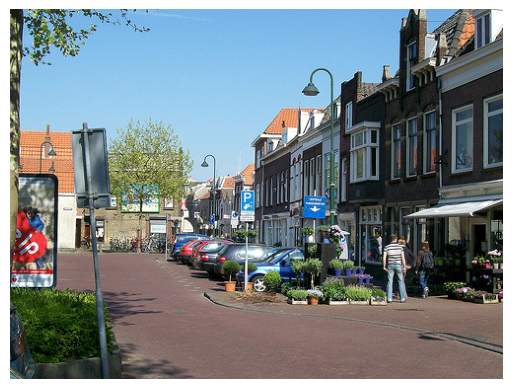

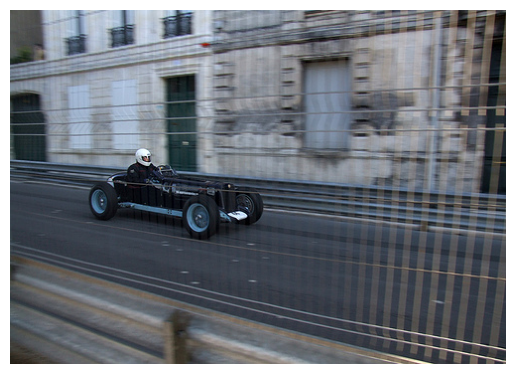

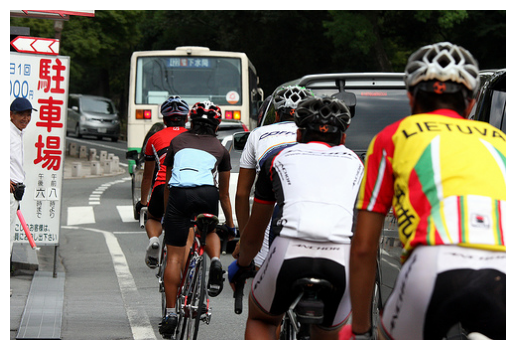

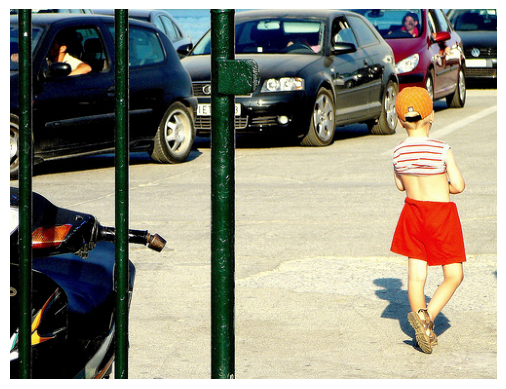

In [39]:
query = "cars on street"

hit_lists = tbl.search(query).metric("cosine").limit(4).to_list()

for hit in hit_lists:
    show_image(hit["image"])

In this code, we perform a semantic search for the query "dog running through sand". The search function leverages LanceDB's capability to handle embeddings efficiently:

- **Encoding the Text**: Only the text query needs to be encoded. The API takes care of converting it into the appropriate vector representation.
- **Performing the Search**: The `tbl.search(query)` method initiates the search, and by chaining methods like `.metric("cosine")` and `.limit(2)`, we specify the search criteria. Cosine similarity is used as the metric to find the most similar embeddings, and the results are limited to the top 2 hits.
- **Retrieving and Displaying Results**: The results are then converted to a list with `.to_list()`, and we loop through the hits to display the corresponding images.

This process is almost **instantaneous**, demonstrating the efficiency and elegance of LanceDB. The seamless integration of search capabilities with data storage ensures that you can quickly and effectively retrieve the most relevant data based on semantic meaning. LanceDB's design abstracts away the complexities, providing a user-friendly interface to perform powerful semantic searches with ease.

### Vector Arithmetic in Action

Get ready to be amazed! We're taking semantic search to the next level by performing vector arithmetic on embeddings, and it works like magic. This approach allows us to manipulate the embeddings in ways that capture complex relationships and nuances in the data, bringing some truly exciting possibilities to life.

Let's dive into the code and see this in action:

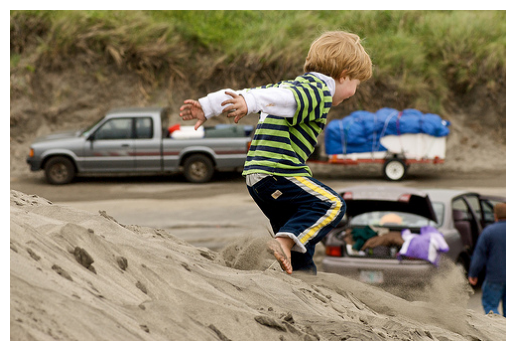

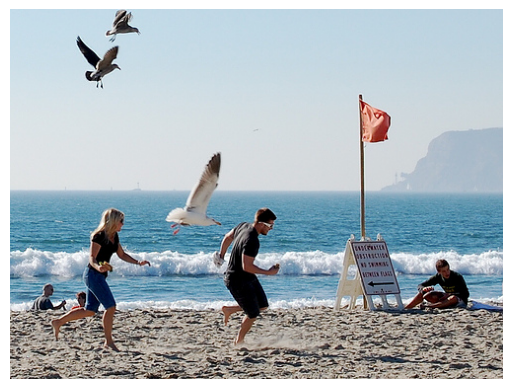

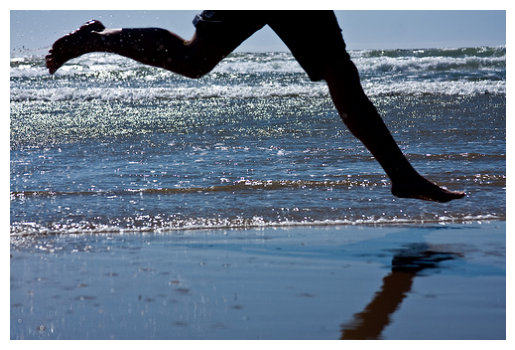

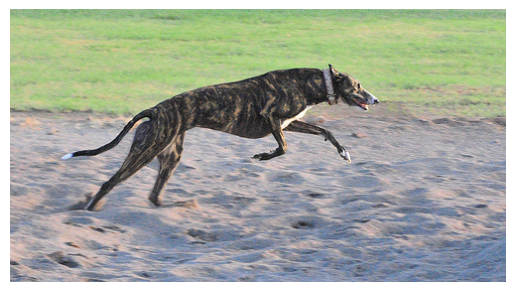

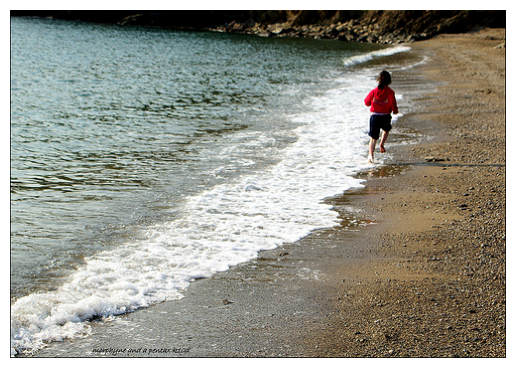

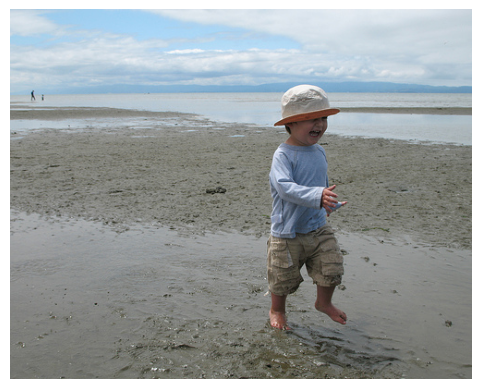

In [40]:
query = "dog running through sand"
sub_query = "dog"
rep_query = "human"

query_emb = get_embedding(query)
sub_query_emb = get_embedding(sub_query)
rep_query_emb = get_embedding(rep_query)

emb = query_emb - sub_query_emb + rep_query_emb

hit_lists = tbl.search(emb).metric("cosine").limit(6).to_list()

for hit in hit_lists:
    show_image(hit["image"])

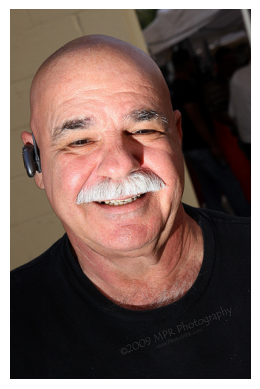

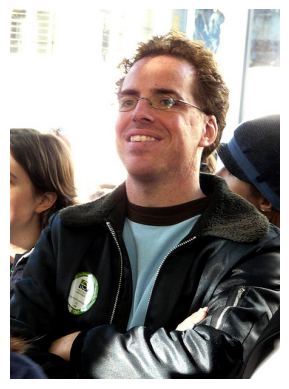

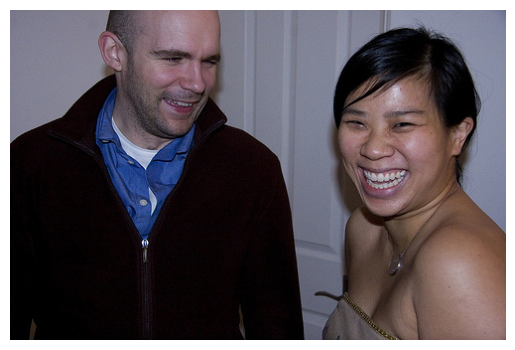

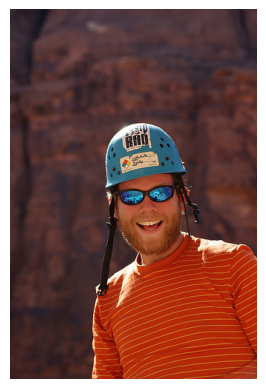

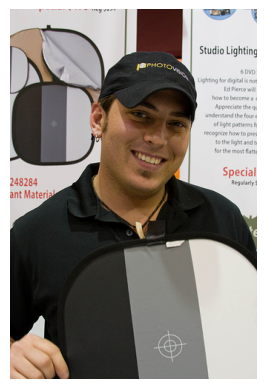

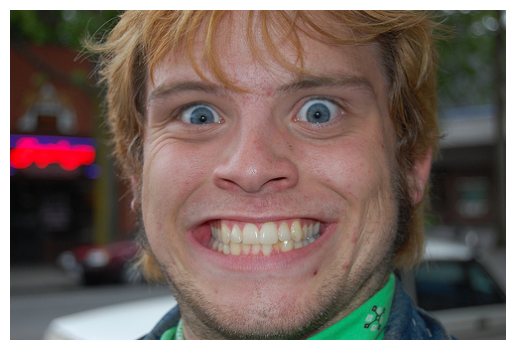

In [41]:
query = "many people happy"
sub_query = "many people"
rep_query = "single man"

query_emb = get_embedding(query)
sub_query_emb = get_embedding(sub_query)
rep_query_emb = get_embedding(rep_query)

emb = query_emb - sub_query_emb + rep_query_emb

hit_lists = tbl.search(emb).metric("cosine").limit(6).to_list()

for hit in hit_lists:
    show_image(hit["image"])

In this example, we start with a query, "dog running through sand", and create embeddings for this query, a sub-query "dog", and a replacement query "human".

By performing the arithmetic operation `query_emb - sub_query_emb + rep_query_emb`, we effectively transform our original query into a new one. This operation intuitively means: replace "dog" with "human".

## Conclusion

Congratulations on making it through this tutorial on vector arithmetic using text embeddings! We've explored the fascinating world of embeddings, understanding their significance in deep learning and how they transform complex data into meaningful vectors.

We've seen how LanceDB, with its powerful and elegant design, simplifies the process of storing, managing, and querying these embeddings, making sophisticated tasks like semantic search and vector arithmetic both accessible and efficient.

A special thanks to [Ayush Chaurasia](https://www.linkedin.com/in/ayushchaurasia/) for his invaluable help in putting this tutorial together. His insights and support have been instrumental in making this guide comprehensive and beginner-friendly.

Thank you for following along, and happy embedding!